# Projet prédiction de la cyphose chez un enfant

### Importation des Librairies et du jeu de données pour l'exploration

In [72]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [73]:
kyphosis_df = pd.read_csv('kyphosis.csv')
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [74]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [75]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


### Préparation des données

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [77]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [78]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [79]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [80]:
print('pourcentage de maladie presente après operation =', (len(kyphosis_True) / len(kyphosis_df))*100,"%")

pourcentage de maladie presente après operation = 20.98765432098765 %


### Visualisation des données 

<Axes: >

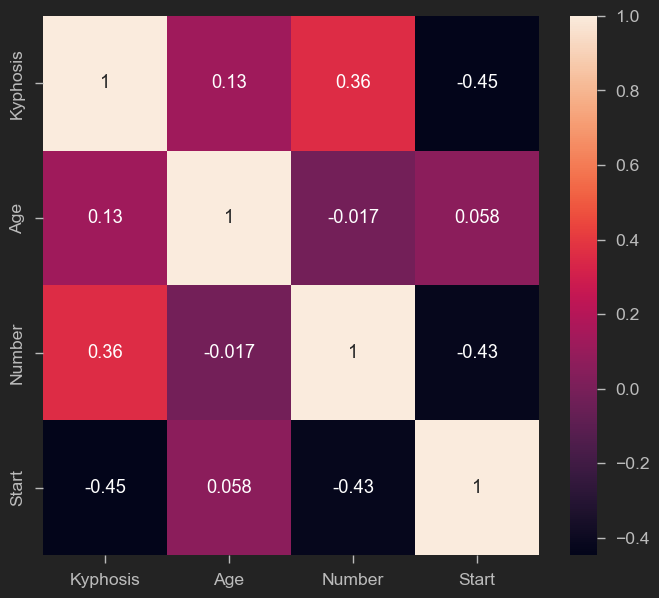

In [81]:
plt.Figure(figsize=(10,10))
sns.heatmap(kyphosis_df.corr(), annot = True)

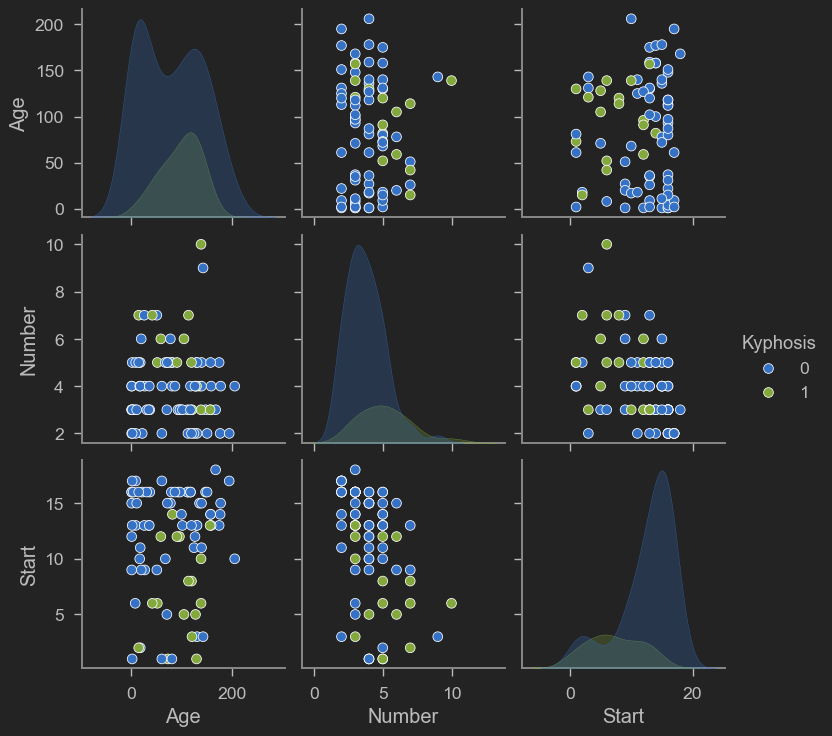

In [82]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

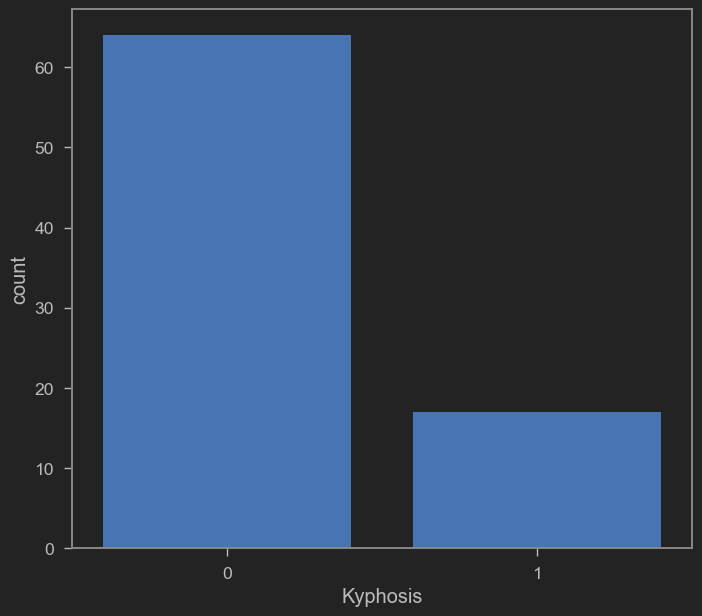

In [83]:
sns.countplot(x = kyphosis_df['Kyphosis'])

### Division du jeu de données en données d'entrainement et données de test

In [84]:
X = kyphosis_df.drop(columns='Kyphosis')
Y = kyphosis_df['Kyphosis']

In [85]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [86]:
Y 

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [87]:
X = np.array(X)
Y = np.array(Y)

In [88]:
Y = Y.reshape(-1,1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [90]:
X_train.shape

(64, 3)

In [91]:
Y_train.shape

(64, 1)

In [92]:
X_test.shape

(17, 3)

In [93]:
Y_test.shape

(17, 1)

### Entrainement et Evaluation du modèle de régression logistique

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\Users\djofa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

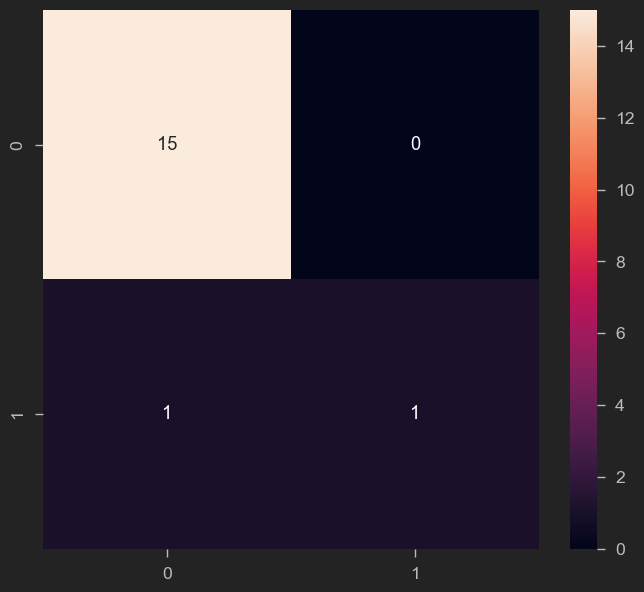

In [96]:
y_predict_test = model.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [97]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.50      0.67         2

    accuracy                           0.94        17
   macro avg       0.97      0.75      0.82        17
weighted avg       0.94      0.94      0.93        17



### Entrainement et Evaluation du modèle d'arbre de décision

In [98]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_Model = DecisionTreeClassifier()
DecisionTree_Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

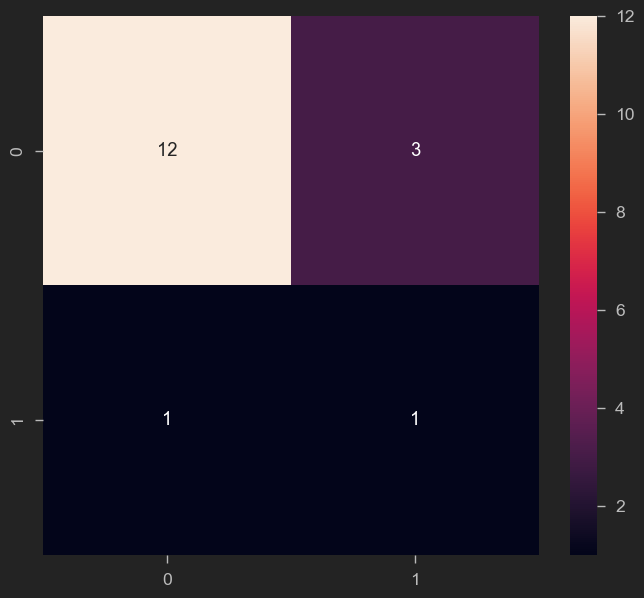

In [100]:
y_predict_test = DecisionTree_Model.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [101]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.25      0.50      0.33         2

    accuracy                           0.76        17
   macro avg       0.59      0.65      0.60        17
weighted avg       0.84      0.76      0.80        17



### Entrainement et Evaluation du modèle de foret aléatoire

In [102]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(X_train, Y_train)

c:\Users\djofa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

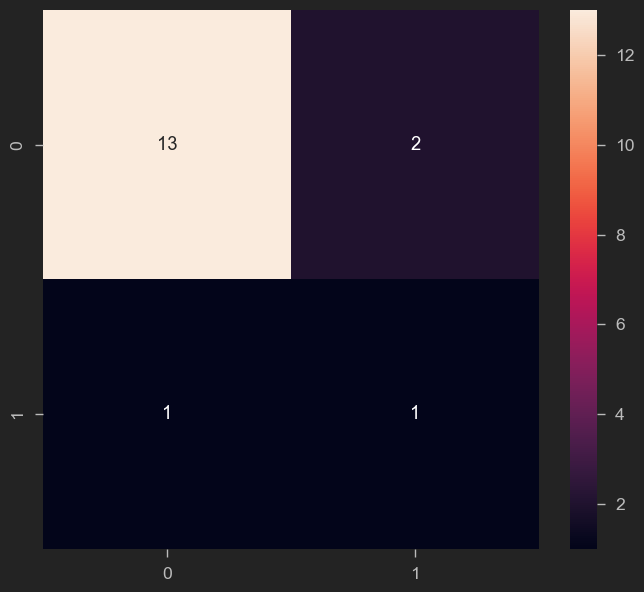

In [104]:
y_predict_test = RandomForest_model.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [105]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.33      0.50      0.40         2

    accuracy                           0.82        17
   macro avg       0.63      0.68      0.65        17
weighted avg       0.86      0.82      0.84        17

